### _Capstone Projekt - Wiederverkaufswert von Gebrauchtwagen vorhersagen_

# **02_Erstes exploratives Analysieren der Daten**

## 1) Libraries importieren

In [7]:
# Libraries importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2) Daten einlesen und einen ersten Überblick bekommen

Sample-Datensatz einlesen.

In [16]:
# Daten importieren
df = pd.read_csv("../Data/sample_data_100k.csv")

# Daten inspizieren
df.head()

/var/folders/kp/zxdhgy711jnb_bngbg987tt80000gn/T/ipykernel_13855/1999135753.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Data/sample_data_100k.csv")


,Unnamed: 0,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,0,SALYK2FV7LA250497,37.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,...,A,8-Speed Automatic Overdrive,t85617,P340 R-Dynamic S AWD,NaN,AWD,All-Wheel Drive,113.1 in,84.4 in,2020
1,1,1C3CCCAB3GN124951,37.6 in,NaN,NaN,NaN,Sedan,NaN,Bronx,23.0,...,A,9-Speed Automatic,t58595,Limited Sedan FWD,NaN,FWD,Front-Wheel Drive,108 in,73.6 in,2016
2,2,ZACNJBC11KPK05419,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,...,A,9-Speed Automatic Overdrive,t83346,Trailhawk 4WD,NaN,4WD,Four-Wheel Drive,101.2 in,79.6 in,2019
3,3,1C4RDJDG2JC150071,38.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bronx,18.0,...,A,8-Speed Automatic,t75321,GT AWD,NaN,AWD,All-Wheel Drive,119.8 in,85.5 in,2018
4,4,2GNALBEK2G6249104,39.9 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bay Shore,NaN,...,A,6-Speed Automatic Overdrive,t58666,LT FWD,NaN,FWD,Front-Wheel Drive,112.5 in,72.5 in,2016


In [19]:
# Informationen zu den Features erhalten
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100040 entries, 0 to 100039
Data columns (total 67 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               100040 non-null  int64  
 1   vin                      100040 non-null  object 
 2   back_legroom             94722 non-null   object 
 3   bed                      659 non-null     object 
 4   bed_height               14110 non-null   object 
 5   bed_length               14110 non-null   object 
 6   body_type                99607 non-null   object 
 7   cabin                    2058 non-null    object 
 8   city                     100040 non-null  object 
 9   city_fuel_economy        83760 non-null   float64
 10  combine_fuel_economy     0 non-null       float64
 11  daysonmarket             100040 non-null  int64  
 12  dealer_zip               100040 non-null  object 
 13  description              97428 non-null   object 
 14  engi

## 3) Erste Analyse und Vertrautmachen mit einzelnen Variablen und Zusammenhängen (Ergänzend zu logischen Überlegungen zu Variablen (vgl. schriftliche Dokumentation) und unserem Tableau-File)

Zusätzlich zu unserer Analyse in Tableau, schauen wir uns auch hier sinnvolle Features noch etwas genauer an und beginnen damit die Daten an manchen Stellen bereits zu bereinigen, sodass wir passende Analysen mit diesen Daten durchführen können.

#### Duplikate ausschliessen (falls vorhanden)

In [24]:
duplicate_rows = df.duplicated()
print("Anzahl der Duplikate:", duplicate_rows.sum())

Anzahl der Duplikate: 0


**Erkenntnis:** Keine Duplikate

#### Anzahl Null Values Analysieren

In [57]:
# Missing values per column
missing_values = df.isnull().sum()

# Percentage of missing values per column
missing_percentage = (missing_values / len(df)) * 100

# Display missing values and percentages
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_info

,Missing Values,Percentage
Unnamed: 0,0,0.000000
vin,0,0.000000
back_legroom,5318,5.315874
bed,99381,99.341263
bed_height,85930,85.895642
...,...,...
wheel_system,4919,4.917033
wheel_system_display,4919,4.917033
wheelbase,5318,5.315874
width,5318,5.315874


#### Preis

In [60]:
# Statistische Zusammenfassung
df['price'].describe()

count    1.000400e+05
mean     2.990942e+04
std      1.982676e+04
min      2.990000e+02
25%      1.841075e+04
50%      2.639000e+04
75%      3.815900e+04
max      1.599500e+06
Name: price, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


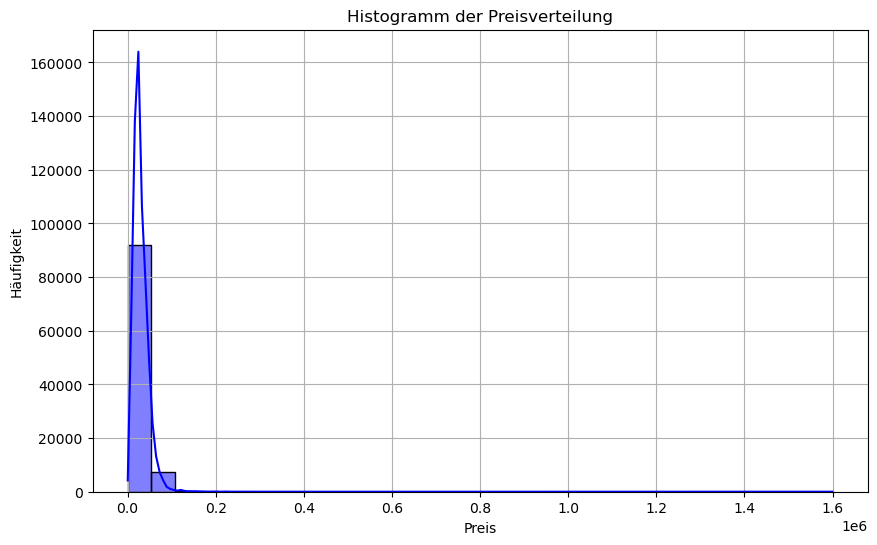

In [62]:
# Histogramm der Preise
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30, color='blue')
plt.title('Histogramm der Preisverteilung')
plt.xlabel('Preis')
plt.ylabel('Häufigkeit')
plt.grid(True)
plt.show()

**Erkenntnis:** Wir müssen beim Preis Outliers entfernen, um Verzerrungen zu vermeiden (Analog Tableau) 

#### Analyse Zusammenhang Preis und Mileage 

In [66]:
df["mileage"].describe()

count     95199.000000
mean      31014.318806
std       45345.965747
min           0.000000
25%           6.000000
50%        7904.000000
75%       43514.500000
max      399578.000000
Name: mileage, dtype: float64

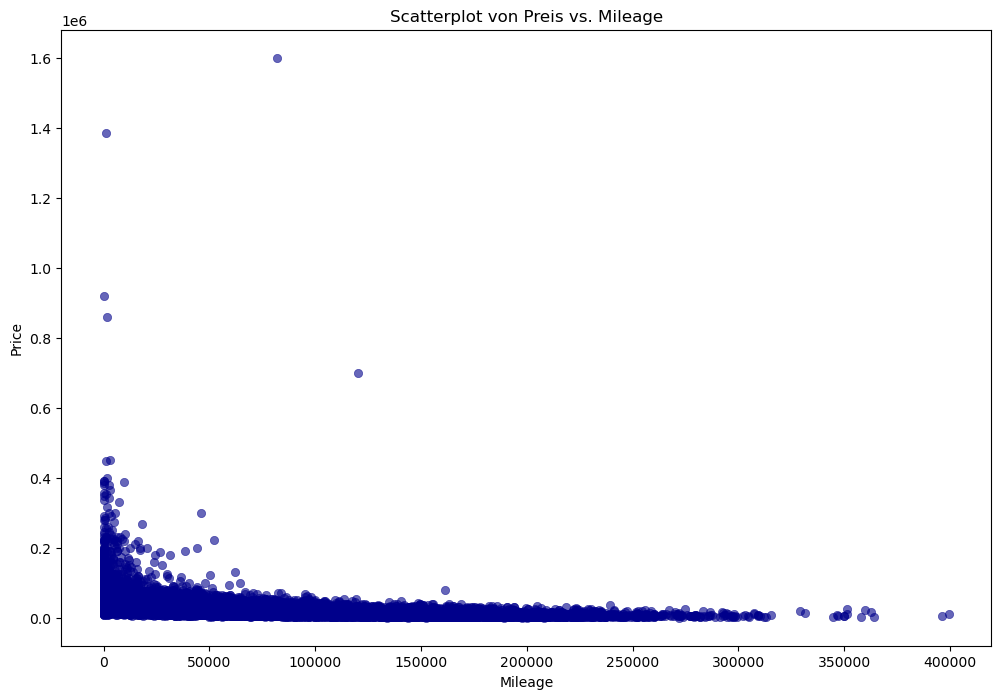

In [90]:
# Scatterplot erstellen
plt.figure(figsize=(12, 8))
sns.scatterplot(x='mileage', y='price', data=df, alpha=0.6, edgecolor=None, color='darkblue')
plt.title('Scatterplot von Preis vs. Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


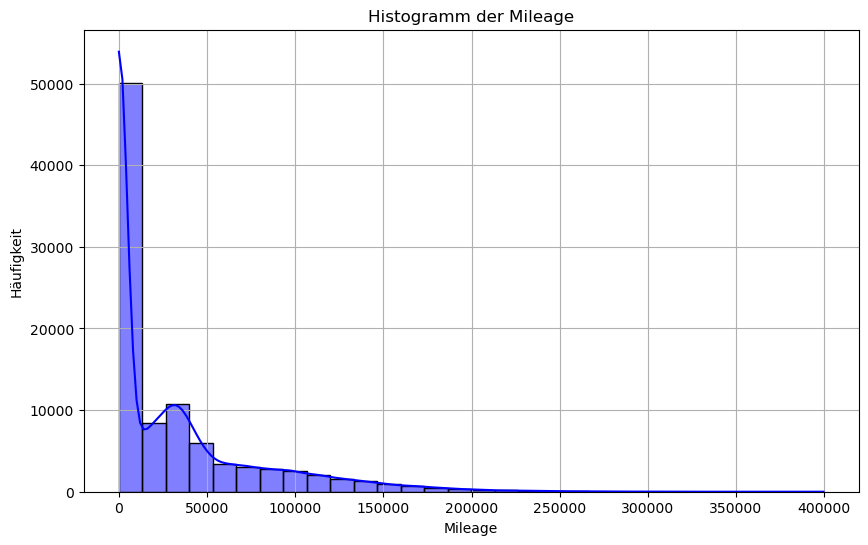

In [70]:
# Histogramm von Mileage (gefahrene km)
plt.figure(figsize=(10, 6))
sns.histplot(df['mileage'], kde=True, bins=30, color='blue')
plt.title('Histogramm der Mileage')
plt.xlabel('Mileage')
plt.ylabel('Häufigkeit')
plt.grid(True)
plt.show()

**Erkenntnis:** Wie erwartet nimmt Preis bei steigender Mileage ab. Viele Autos mit tiefer Mileage.

#### Analyse Engine Type und Engine Cylinders

In [75]:
# Analysieren, ob in den Variablen gleiche Werte vorhanden sind (Redundanzen erkennen)
df["engine_cylinders"].info()
print("\n" + "Anzahl gleicher Werte in Spalten engine_cylinders und engine_type: ")
(df["engine_cylinders"] ==  df["engine_type"]).sum()

<class 'pandas.core.series.Series'>
RangeIndex: 100040 entries, 0 to 100039
Series name: engine_cylinders
Non-Null Count  Dtype 
--------------  ----- 
96726 non-null  object
dtypes: object(1)
memory usage: 781.7+ KB

Anzahl gleicher Werte in Spalten engine_cylinders und engine_type: 


96726

**Erkenntnis:** Spalten haben gleichen Inhalt

#### Analyse Frame Damaged

In [55]:
print("Nullwerte: " + str(df["frame_damaged"].isnull().sum()))
df["frame_damaged"].value_counts()

Nullwerte: 47626


frame_damaged
False    51903
True       511
Name: count, dtype: int64

**Erkenntnis:** Viele Null-Werte

#### Analyse is_new

In [82]:
df["is_new"].value_counts()

is_new
False    50887
True     49153
Name: count, dtype: int64

#### Analyse Torque

In [ ]:
df["torque"]

0         332 lb-ft @ 3,500 RPM
1         262 lb-ft @ 4,250 RPM
2         200 lb-ft @ 1,750 RPM
3         260 lb-ft @ 4,000 RPM
4         172 lb-ft @ 4,900 RPM
                  ...          
100035                      NaN
100036    266 lb-ft @ 2,800 RPM
100037    270 lb-ft @ 1,750 RPM
100038    318 lb-ft @ 1,750 RPM
100039    175 lb-ft @ 4,400 RPM
Name: torque, Length: 99251, dtype: object

**Erkenntnis:** Werte nichtssagend.

#### Analyse transmission_display

In [98]:
df["transmission_display"].unique()

array(['8-Speed Automatic Overdrive', '9-Speed Automatic',
       '9-Speed Automatic Overdrive', '8-Speed Automatic',
       '6-Speed Automatic Overdrive', '6-Speed Automatic', 'Automatic',
       'Continuously Variable Transmission', '6-Speed Manual',
       '7-Speed Automatic', '4-Speed Automatic', nan, '5-Speed Automatic',
       'Manual', '4-Speed Automatic Overdrive',
       '5-Speed Automatic Overdrive', '5-Speed Manual Overdrive',
       '1-Speed Automatic', '7-Speed CVT', '5-Speed Manual',
       '6-Speed Dual Clutch', '7-Speed Dual Clutch',
       '8-Speed Dual Clutch', '7-Speed Automatic Overdrive',
       '1-Speed CVT', '6-Speed CVT', '3-Speed Automatic',
       '7-Speed Manual', '6-Speed Manual Overdrive', '4-Speed Manual',
       '3-Speed Manual', '4-Speed CVT', '10-Speed Automatic',
       '8-Speed CVT', '2-Speed Automatic', '8-Speed Manual',
       '1-Speed Dual Clutch', '9-Speed Dual Clutch'], dtype=object)

**Erkenntnis:** Die verschiedenen Getriebearten müssten zusammengefasst werden zu Manual und Automatik -> neue Variable erstellen mit 0 und 1 (manuell: nein - ja)

#### Analyse trim_name

In [102]:
df["trim_name"]

0         P340 R-Dynamic S AWD
1            Limited Sedan FWD
2                Trailhawk 4WD
3                       GT AWD
4                       LT FWD
                  ...         
100035             1.5T LT FWD
100036                  LS FWD
100037                      SE
100038         20d Premium AWD
100039           2017.5 SV FWD
Name: trim_name, Length: 100040, dtype: object

In [104]:
df["trim_name"].value_counts()

trim_name
SE FWD                          2988
S FWD                           1625
XLT SuperCrew 4WD               1389
LX FWD                          1283
LT FWD                          1260
                                ... 
E 400 4MATIC Sedan AWD             1
Platinum Crew Cab LB DRW RWD       1
S Special Edition                  1
Type 10 Convertible FWD            1
Tradesman Crew Cab                 1
Name: count, Length: 4147, dtype: int64

**Erkenntnis:** Variable nicht brauchbar.

#### Analyse wheelbase

In [108]:
df["wheelbase"]

0         113.1 in
1           108 in
2         101.2 in
3         119.8 in
4         112.5 in
            ...   
100035    107.3 in
100036    120.9 in
100037    112.2 in
100038    111.6 in
100039    106.5 in
Name: wheelbase, Length: 100040, dtype: object

**Erkenntnis:** Falls für Analyse verwendet, müssten Masseinheiten entfernt werden.